In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os, random
import cv2
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam 
from tensorflow import keras
import keras.layers as layers
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# path to images
path = '/content/drive/MyDrive/images/'

# animal categories
categories = ['mountain','ocean','street','forest']
no_cate=len(categories)
no_cate #number of categories

4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

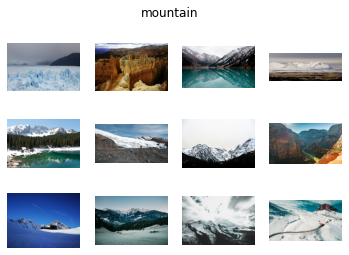

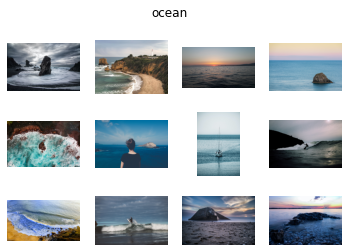

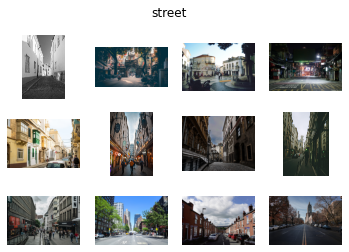

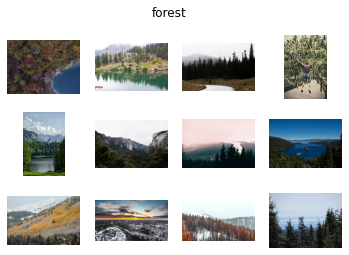

In [ ]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

randomly select 100 pictures for each category to view the size

In [ ]:
shape0 = []
shape1 = []

for category in categories:
    for files in random.sample(os.listdir(path+category),100):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []


mountain  => height min :  417 width min :  1000
mountain  => height max :  1506 width max :  1000
ocean  => height min :  562 width min :  1000
ocean  => height max :  1780 width max :  1000
street  => height min :  288 width min :  509
street  => height max :  2057 width max :  1000
forest  => height min :  398 width min :  1000
forest  => height max :  1780 width max :  1000


Resize pictures to equate height and width for each picture

In [ ]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH =32
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) 
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)     
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)
        

[['/content/drive/MyDrive/images/mountain/mountain1156.jpg', 0], ['/content/drive/MyDrive/images/forest/forest1461.jpg', 3], ['/content/drive/MyDrive/images/street/street1445.jpg', 2], ['/content/drive/MyDrive/images/mountain/mountain1817.jpg', 0], ['/content/drive/MyDrive/images/mountain/mountain1777.jpg', 0], ['/content/drive/MyDrive/images/ocean/ocean1409.jpg', 1], ['/content/drive/MyDrive/images/ocean/ocean11.jpg', 1], ['/content/drive/MyDrive/images/forest/forest352.jpg', 3], ['/content/drive/MyDrive/images/street/street1279.jpg', 2], ['/content/drive/MyDrive/images/mountain/mountain1252.jpg', 0]]


Normalization

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

train-validation-test splitting

In [ ]:
#80% for training and 20% for testing
#option 1: make split for each category (stratified sampling)
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.15,random_state=3011,stratify=labels)

#option 2: split all data together
#(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=3011)

In [ ]:
#further split train data to get validation dataset
(trainX,validationX,trainY,validationY)=train_test_split(trainX,trainY,test_size=15/85,random_state=3011,stratify=trainY)
validationY=np_utils.to_categorical(validationY,no_cate)
trainY=np_utils.to_categorical(trainY,no_cate)
testY=np_utils.to_categorical(testY,no_cate)


In [ ]:
print(trainX.shape)
print(validationX.shape)
print(testX.shape)
print(trainY.shape)
print(validationY.shape)
print(testY.shape)

(5600, 32, 32, 3)
(1200, 32, 32, 3)
(1200, 32, 32, 3)
(5600, 4)
(1200, 4)
(1200, 4)


#Model Fitting 1: KNN

In [ ]:
# -*- coding:utf-8 -*-
import numpy as np
# cross_validation deprecated，model_selection takes place
from sklearn import neighbors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




nsamples, nx, ny, nz = trainX.shape
d2_Xtrain = trainX.reshape((nsamples,nx*ny*nz))

nsamples1, nx1, ny1, nz1 = testX.shape
d2_Xtest = testX.reshape((nsamples1,nx1*ny1*nz1))

nsamples2, nx2, ny2, nz2 = validationX.shape
d2_Xcv = validationX.reshape((nsamples2,nx2*ny2*nz2))

clf = neighbors.KNeighborsClassifier(n_neighbors=5)


for n_neighbors in range(1,100):
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(d2_Xtrain,trainY)

    accuracy = clf.score(d2_Xcv, validationY)
    print(n_neighbors, accuracy)
 

1 0.4241666666666667
2 0.24666666666666667
3 0.39916666666666667
4 0.29
5 0.38666666666666666
6 0.30916666666666665
7 0.3925
8 0.32666666666666666
9 0.3858333333333333
10 0.33166666666666667
11 0.37583333333333335
12 0.3425
13 0.38166666666666665
14 0.345
15 0.38166666666666665
16 0.3491666666666667
17 0.37916666666666665
18 0.3466666666666667
19 0.37166666666666665
20 0.3458333333333333
21 0.36833333333333335
22 0.3425
23 0.365
24 0.3475
25 0.36583333333333334
26 0.3491666666666667
27 0.37166666666666665
28 0.355
29 0.3725
30 0.355
31 0.37583333333333335
32 0.36
33 0.37083333333333335
34 0.3541666666666667
35 0.3725
36 0.355
37 0.36916666666666664
38 0.3566666666666667
39 0.3725
40 0.3566666666666667
41 0.37
42 0.35583333333333333
43 0.37
44 0.3541666666666667
45 0.36666666666666664
46 0.3516666666666667
47 0.365
48 0.3491666666666667
49 0.36583333333333334
50 0.34833333333333333
51 0.3641666666666667
52 0.3491666666666667
53 0.3575
54 0.3516666666666667
55 0.365
56 0.3533333333333333

Clearly, when the number of neighbors is 1, the validation score is the best
So we use it on testing data

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(d2_Xtrain,trainY)
accuracy = clf.score(d2_Xtest, testY)
print(accuracy)

0.39916666666666667
